# Learning Econometrics in a unique way:
So far, I have just been reading the assumptions and statements given in the textbook as facts, and never actually stopped to question myself 'Why'?
Hence, here are a few ideas that I'd be covering in this jupiter file:
- Stating the assumptions (Simple and Multiple linear regressions)and actually testing them using fabricated sample data/datasets found on kaggle
- Creating a table to show clear calculation of the residuals, error terms, etc
- Creating neat regression tables with p-values shown and interpreting these values for fun regressions (like impact of taylor swift's songs on peoples' moods, movie dataset, etc.)

My ultimate goal is learn this subject properly, and also share this knowledge to people around the world.
In this goal, I wish to cover:
- Handling and setting up my data properly for regressions
- Writing clean lines of code with proper comments
- Creating great visualizations using matplotlib and seaborn
- (Maybe in the future)Creating animated plots using dash for people to understand econometrics even better

## 01. Showing the meaning of unbiasedness using data

#### 01. Importing the required libraries:


In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

#### 02. Creating a fixed population and setting the parameter values 
The PRF is given by $$ y = \beta_0 + \beta_1 x + u $$

Our explanatory variable follows a uniform distribution to avoid clustering around the mean. Error term is normally distributed following the OLS assumption that over large values, the error term is normally distributed. 

In [ ]:
np.random.seed(42)  # For reproducibility
N = 100000  # Population size
beta_0 = 5  # True intercept
beta_1 = 2  # True slope
x_population = np.random.uniform(0, 10, N)  # Random x values
u_population = np.random.normal(0, 2, N)  # Error term with mean 0, variance 4
y_population = beta_0 + beta_1 * x_population + u_population  # Population regression function 

#### 03. Running repeated sampling and storing the values

In [3]:
num_samples = 1000  # Number of samples to take
sample_size = 100  # Size of each sample
beta_1_estimates = []  # Store estimated beta_1 values

#### 04. Running a loop to run the regression on each of the sample and storing the beta_1 values in the list

In [4]:
for _ in range(num_samples):
    sample_indices = np.random.choice(N, sample_size, replace=False)  # Random sample
    x_sample = x_population[sample_indices]
    y_sample = y_population[sample_indices]
    X_sample = sm.add_constant(x_sample)  # Add intercept term
    model = sm.OLS(y_sample, X_sample).fit()
    beta_1_estimates.append(model.params[1])  # Store estimated beta_1

#### 05. Computing the Mean of Estimated Coefficients

In [5]:
mean_beta_1 = np.mean(beta_1_estimates)
print(f"True beta_1: {beta_1}, Mean estimated beta_1: {mean_beta_1}")

True beta_1: 2, Mean estimated beta_1: 2.0042903351532653


#### 06. Visualizing the beta values

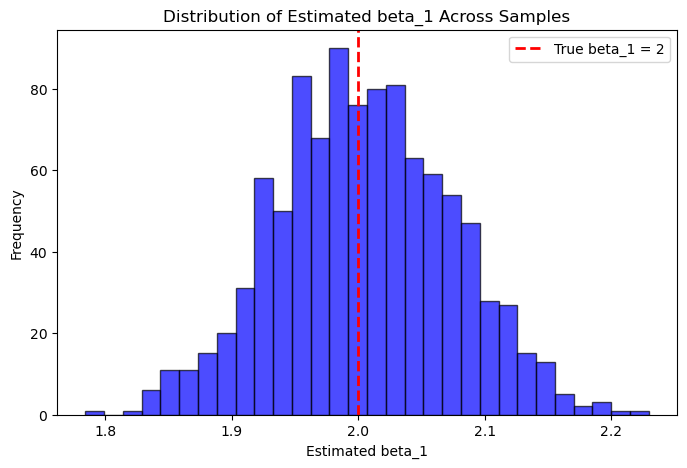

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(beta_1_estimates, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(beta_1, color='red', linestyle='dashed', linewidth=2, label=f'True beta_1 = {beta_1}')
plt.xlabel("Estimated beta_1")
plt.ylabel("Frequency")
plt.title("Distribution of Estimated beta_1 Across Samples")
plt.legend()
plt.show()

Therefore, we can see that the values of beta_1 obtained by running a regression on each of the sample mostly follow a normal distribution, with their average value equal to (almost) the true population parameter, which is 2.
This is what is meant when we say that OLS estimators are unbiased. 

#### 07. Summary of what steps we did (and why)
1. We first defined the population regression function (PRF) and set the number of observations in the population to 100,000.
2. Then, we set the slope and intercept as 2 and 5, respectively. This creates the y value, and accordingly synthetic data adjusts. 
3. Thus, we can change the values, and the property would still hold. 
4. Next, we take 1,000 samples of 100 each, and store the values of $ \hat{\beta}_1 $ that we get after running a regression on each sample in the list.
5. Finally, we take the average of the $ \hat{\beta}_1 $ and see how close it is to the population values

## 02. Violating the assumptions purposefully and practically understanding what happens to our model when the assumptions are violated

#### 01. Loading the dataset
- We would be using the mpg dataset from seaborn library.

In [2]:
import seaborn as sns 
mpg = sns.load_dataset('mpg')
mpg = mpg.dropna()

#### 02. Running a multiple linear regression using two variables first.
The regression equation would be $$ \widehat{mpg} = \hat{\beta}_0 + \hat{\beta}_1 \cdot hpower + \hat{\beta}_2 \cdot weight $$ where $\hat{\beta}_1 $ gives us the impact of a unit increase in the horsepower on the fuel average, and $ \hat{\beta}_2 $ gives us the impact of a unit increase in engine weight on the fuel average of the vehicle.

In [3]:
# Select relevant variables
X = mpg[['horsepower', 'weight']]  # Independent variables
y = mpg['mpg']  # Dependent variable
# Adding a constant for the intercept
X = sm.add_constant(X)
# Run the regression
model = sm.OLS(y, X).fit()
# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          3.06e-104
Time:                        11:13:14   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6402      0.793     57.540      0.0

#### 03. Violating the linearity assumption by making one of the coefficients quadratic, and running the following regression:
$$
\hat{mpg}_i = \hat{\beta}_0 + \hat{\beta}_1^2 \cdot horsepower_i + \hat{\beta}_2 \cdot weight_i + u_i
$$

                            OLS Regression Results                            
Dep. Variable:                mpg_mod   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     6389.
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          3.21e-298
Time:                        11:38:33   Log-Likelihood:                -3468.4
No. Observations:                 392   AIC:                             6943.
Df Residuals:                     389   BIC:                             6955.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.226e+04    316.293    -38.752      0.0

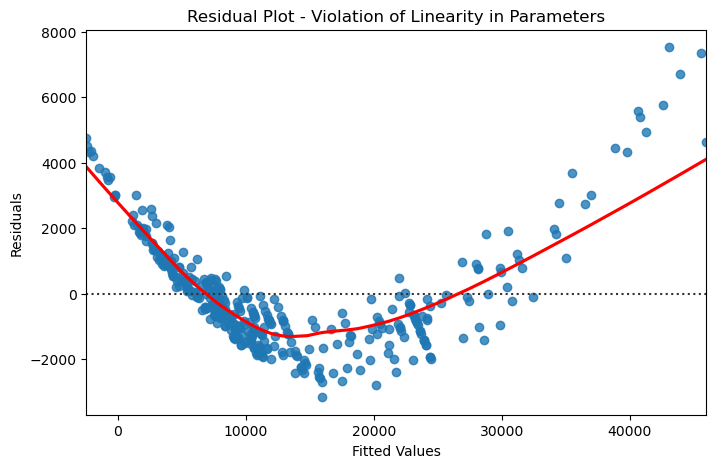

In [5]:
mpg['mpg_mod'] = mpg['horsepower']**2 + (-0.003 * mpg['weight']) + np.random.normal(0, 2, len(mpg))

# Define the incorrect OLS model (which assumes linearity in parameters)
X = mpg[['horsepower', 'weight']]
X = sm.add_constant(X)  # Add intercept
y = mpg['mpg_mod']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary results
print(model.summary())

# Plot residuals to check for patterns
plt.figure(figsize=(8, 5))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Violation of Linearity in Parameters")
plt.show()

As we can see, there are a number of problems that arise when the coefficient becomes non-linear:
1. $ R^2 $ has a massive jump, which shows that the model might be overfitting
2. The residual plot shows a curvy graph, which shows that the regression is no longer linear
3. Both the slope coefficients, as well as the intercept show a massive jump in their values, compared to the linear model, which show how distorted the estimators have become

#### 04. Violating the random sampling assumption by filtering and selecting data.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     132.0
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.50e-33
Time:                        13:48:37   Log-Likelihood:                -348.08
No. Observations:                 150   AIC:                             702.2
Df Residuals:                     147   BIC:                             711.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.5562      1.245     29.372      0.0

c:\Users\AdityaTheEmp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AdityaTheEmp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


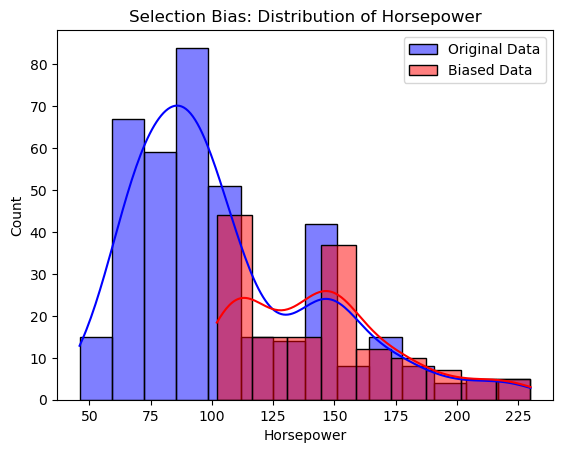

In [6]:
mpg_biased = mpg[mpg['horsepower'] > 100]

# Define independent (X) and dependent (y) variables
y_biased = mpg_biased['mpg']
X_biased = mpg_biased[['horsepower', 'weight']]
X_biased = sm.add_constant(X_biased)  # Add intercept

# Run OLS regression on biased sample
model_biased = sm.OLS(y_biased, X_biased).fit()
print(model_biased.summary())

# Visualizing the impact of selection bias
sns.histplot(mpg['horsepower'], kde=True, color='blue', label='Original Data', alpha=0.5)
sns.histplot(mpg_biased['horsepower'], kde=True, color='red', label='Biased Data', alpha=0.5)
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Selection Bias: Distribution of Horsepower")
plt.legend()
plt.show()

Due to the violation of random sampling assumption, we see that:
- $ R^2 $ is reduced, because the model does not completely explain the variation
- Coefficient values are also distorted.